# FloPy

## Plotting unstructured grids
This notebook demonstrates the unstructured mapping capabilities of flopy.

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import flopy

datapth = os.path.join('..', 'data', 'unstructured')

In [2]:
# functions to load vertices and incidence lists
def load_verts(fname):
    return(np.genfromtxt(fname))

def load_iverts(fname):
    f = open(fname, 'r')
    iverts = []
    xc = []
    yc = []
    for line in f:
        ll = line.strip().split()
        iverts.append([int(i) - 1 for i in ll[4:]])
        xc.append(float(ll[1]))
        yc.append(float(ll[2]))
    return iverts, np.array(xc), np.array(yc)

In [3]:
# load vertices
fname = os.path.join(datapth, 'ugrid_verts.dat')
verts = load_verts(fname)[:, 1:]

# load iverts
fname = os.path.join(datapth, 'ugrid_iverts.dat')
iverts, xc, yc = load_iverts(fname)

In [4]:
ncpl = np.array(5 * [len(iverts)])
sr = flopy.utils.reference.SpatialReferenceUnstructured(xc, yc, verts, iverts, ncpl)
print(sr)

xul:0; yul:0; rotation:0; proj4_str:+init=EPSG:4326; units:meters; lenuni:1; length_multiplier:1.0


TypeError: plot_array() got an unexpected keyword argument 'ax'

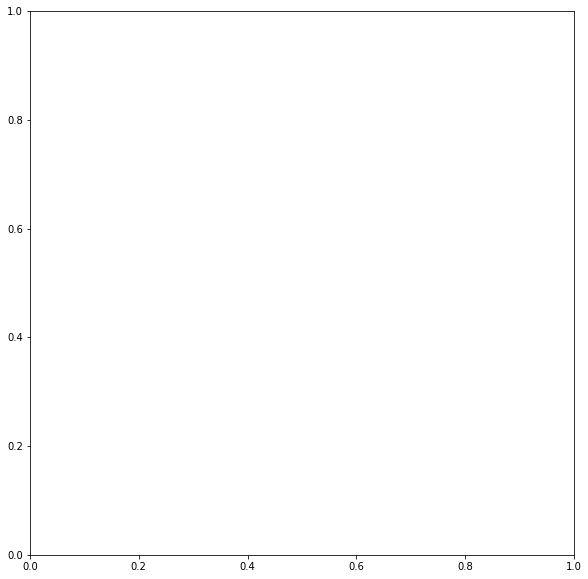

In [10]:
f = plt.figure(figsize=(10, 10))
ax = f.gca()
a = np.random.random((ncpl[0]))
mm = flopy.plot.ModelMap(sr=sr)
mm.plot_array(a)
mm.contour_array(a)
plt.plot(xc, yc, 'bo')

In [ ]:
ibound = np.ones((ncpl[0]))
ibound[0:10] = -1
ibound[-10:] = 0
mm = flopy.plot.ModelMap(sr=sr)
mm.plot_ibound(ibound=ibound)

In [ ]:
f = plt.figure(figsize=(10, 10))
mm = flopy.plot.ModelMap(sr=sr)
mm.plot_grid(colors='green')
plt.plot(sr.xcenter, sr.ycenter, 'bo')

In [ ]:
fname = os.path.join(datapth, 'Trimesh_local.exp')
f = plt.figure(figsize=(10, 10))
sr = flopy.utils.reference.SpatialReferenceUnstructured.from_argus_export(fname, nlay=1)
mm = flopy.plot.ModelMap(sr=sr)
mm.plot_grid(colors='green')
#plt.plot(sr.xcenter, sr.ycenter, 'bo')

In [ ]:
f = plt.figure(figsize=(10, 10))
fnames = [fname for fname in os.listdir(datapth) if fname.endswith('.exp')]
nplot = len(fnames)
for i, f in enumerate(fnames):
    ax = plt.subplot(nplot / 2 + 1, 2, i + 1, aspect='equal')
    fname = os.path.join(datapth, f)
    sr = flopy.utils.reference.SpatialReferenceUnstructured.from_argus_export(fname, nlay=1)
    mm = flopy.plot.ModelMap(sr=sr, ax=ax)
    mm.plot_grid(colors='k')
    ax.set_title(fname)